# Семинар 1. Моделирование траектории одиночной цели и формирование потока измерений

In [22]:
import time                         # библиотека функций системного времени
import numpy as np                  # библиотека математических функций
import matplotlib.pyplot as plt     # библиотека построения графиков
%matplotlib widget

## модели движения цели (CV, CA, CT)

Обобщённая модель описывается выражением: $$X_k = f(X_{k-1})+b(u_k) + g(w_k),$$ где 
* $w_k \sim \mathcal{N}(0,Q)$, и $Q_k = M\{ w_k\cdot w_k^T \}$
* $f(\cdot)$ - функция экстраполяции вектора траекторных параметров, $b(\cdot)$ - функция управляющего воздействия на цель, $g(\cdot)$ - функция пересчета случайного воздействия в пространство траекторных параметров.

одномерная модель движения цели с примерно постоянной скоростью (constant velocity, CV), где $a_k\sim \mathcal{N}(0,\sigma_a^2)$

$$ \vec{X}_k = \begin{bmatrix} x_k \\ v^x_k \end{bmatrix} = \begin{bmatrix}
                1 & T \\ 0 & 1
            \end{bmatrix}
        \cdot \begin{bmatrix} x_{k-1} \\ v^x_{k-1} \end{bmatrix}  + \begin{bmatrix} T^2/2 \\ T \end{bmatrix} \cdot a_k $$

Сформируем отсчеты траектории цели для одномерного случая. Для этого выполним следующий код:

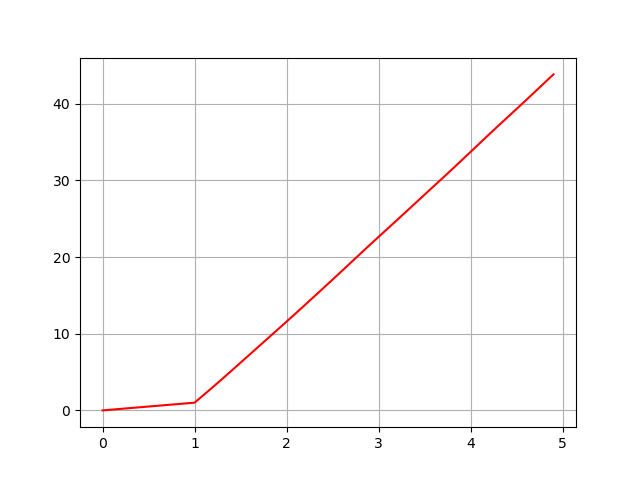

In [23]:
T = 5.0                             # продолжительность траектории
dt = 0.1                              # шаг дискретизации траектории
time_series = np.arange(1,T,dt)     # отсчеты времени

F = np.array(   [[1.0,  dt],        # матрица перехода текущего состояния в будущее
                [0.0,  1.0]])
G = np.array([dt**2/2, dt])         # матрица связи возмущающего воздействия с вектором состояния объекта

X = np.array([0,    # x_k
              10])  # vx_k             # начальное значение вектора состояния объекта

process_noise = 1                   # СКО возмущающего воздействия
np.random.seed(0)                   # выбор случайной последовательности

X_log = {'time':[0], 'state':[X]}   # сохранение данных для отображения
for t in time_series:
    ax = np.random.normal(0,process_noise)
    X = F@X + G*ax
    X_log['time'].append(t)
    X_log['state'].append(X)

x = [X_log['state'][i][0] for i in range(len(X_log['state']))]  # выборка комопненты 'х' ~ [0] из вектора состояния

plt.plot(X_log['time'], x, 'r')
plt.grid()
plt.show()

одномерная модель движения цели с примерно постоянным ускорением (constant acceleration, CA), где $\eta_k\sim \mathcal{N}(0,\sigma_{\eta}^2)$

$$ \vec{X}_k = \begin{bmatrix} x_k \\ v^x_k \\ a^x_k \end{bmatrix} = \begin{bmatrix}
                1 & T & T^2/2 \\ 0 & 1 & T \\ 0 & 0 & 1
            \end{bmatrix}
            \cdot \begin{bmatrix} x_{k-1} \\ v^x_{k-1} \\ a^x_{k-1} \end{bmatrix}  + \begin{bmatrix} T^2/2 \\ T \\ 1 \end{bmatrix} \cdot \eta_k $$

двумерная модель движения цели с примерно постоянной скоростью и примерно постоянной угловой скоростью $\omega_k$ (constant turn, CT), где
* вектор состояния цели имеет вид $\vec{X}_k = \begin{bmatrix} x_k & y_k & v^x_k & v^y_k & \omega_k \end{bmatrix}^T$
* $\vec{\eta_k}= [a_x, a_y, w_n]^T\sim \mathcal{N}(\vec{0},\sigma_{\vec{\eta}}^2) $,

$$
 \vec{X}_k = \begin{bmatrix}
                1 & 0 & \frac{\sin (\omega_{k-1}T)}{\omega_{k-1}} & -\frac{1-\cos (\omega_{k-1}T)}{\omega_{k-1}} & 0 \\
                0 & 1 & \frac{1-\cos (\omega_{k-1}T)}{\omega_{k-1}} & \frac{\sin (\omega_{k-1}T)}{\omega_{k-1}} & 0 \\
                0 & 0 & \cos (\omega_{k-1}T) & -\sin (\omega_{k-1}T) & 0 \\
                0 & 0 & \sin (\omega_{k-1}T) & \cos (\omega_{k-1}T) & 0 \\
                0 & 0& 0&  0& 1 
            \end{bmatrix}\cdot{\vec{X}_{k-1}}+
            \begin{bmatrix}
                T^2/2 & 0 & 0 \\ 0 & T^2/2 & 0 \\ T & 0 & 0 \\0 & T & 0 \\ 0 & 0 & 1
            \end{bmatrix}\cdot \vec{\eta}_k
$$

## Задание №1.

Постройте двумерную траекторию движения объекта в течение **T = 50 секунд**. СКО возмущающего воздействия оставьте **$\sigma = 1$ м/с/с**. Четные варианты делают **CT** модель движения ($w = 5 гр/с, w_n = 0 рад/с$), нечетные - **CA** модель движения.

In [24]:
# напишите свой код в этом блоке

T = 50                              # продолжительность траектории
dt = 1                              # шаг дискретизации траектории
time_series = np.arange(1, T, dt)     # отсчеты времени

F2D = np.array([[1.0,  dt, 0.0, 0.0],
                [0.0, 1.0, 0.0, 0.0],
                [0.0, 0.0, 1.0,  dt],
                [0.0, 0.0, 0.0, 1.0]])

G2D = np.array([[dt**2/2,   0.0],
                [dt,        0.0],
                [0.0,   dt**2/2],
                [0.0,   dt     ]])

X2D= np.array([[0.0],
               [10.0],
               [0.0],
               [30.0]])
process_noise = 1                   # СКО возмущающего воздействия
np.random.seed(0)                   # выбор случайной последовательности

X_log = {'time':[0], 'state':[X2D]}   # сохранение данных для отображения
for t in time_series:
    ax1 = np.random.normal(0, process_noise, (2, 1))
    X2D = F2D@X2D + G2D@ax1
    X_log['time'].append(t)
    X_log['state'].append(X2D)

x  = np.array([X_log['state'][i][0] for i in range(len(X_log['state']))])  # выборка комопненты 'х'  ~ [0] из вектора состояния
Vx = np.array([X_log['state'][i][1] for i in range(len(X_log['state']))])  # выборка комопненты 'Vx' ~ [1] из вектора состояния
y  = np.array([X_log['state'][i][2] for i in range(len(X_log['state']))])  # выборка комопненты 'y'  ~ [2] из вектора состояния
Vy = np.array([X_log['state'][i][3] for i in range(len(X_log['state']))])  # выборка комопненты 'Vy' ~ [3] из вектора состояния

## Модель измерений от цели
Обобщённая модель описывается выражением:
$$z_k = h(X_k)+e_k,$$
где 
* $e_k \sim \mathcal{N}(0, R_k)$,  и $R_k = M\{ е_k\cdot е_k^T \}$
* $h(\cdot)$ - функция связи вектора траекторных параметров и вектора измерений

В зависимости от выбранной СК, в которой описывается вектор состояни цели, или иными словами траектория, и СК, в которой происходят измерения, функция $h(\cdot)$ имеет различный вид.

Например, если вектор состояния цели задан в ДСК как $X_k = [x, y]_k^T$, то 
* если измерения координат в ДСК  $$ z_k = [x_k  y_k]^T+e_k$$
* если измерения наклонной дальности в ПСК  $$ z_k = \sqrt{(x_k)^2+(y_k)^2}+e_k$$
* если измерения пеленга цели в ПСК  $$ z_k = \arctan \left( \frac{y_k}{x_k}\right)+e_k$$

На примере ранее полученной одномерной траектории сформируем массив измерений c СКО **$\sigma = 30$ м**. Для этого выполним следующий код:

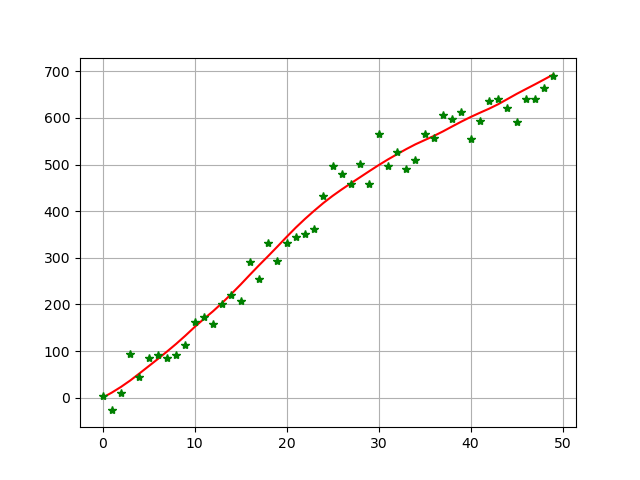

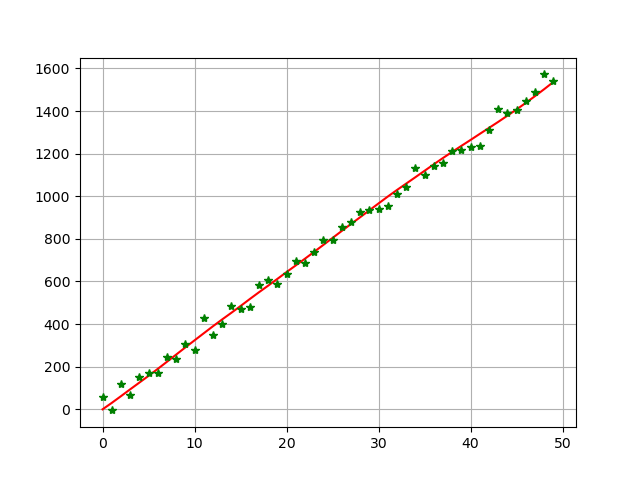

In [25]:
H = np.array([[1.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])
sigma = 30

z_log = []
for i in range(len(X_log['state'])):
    e = np.random.normal(0, sigma, (4,1))
    z = H@X_log['state'][i] + e
    z_log.append(z)
z_log = np.array(z_log).squeeze()

plt.figure()
plt.plot(X_log['time'], x, 'r',
         X_log['time'], z_log[:, 0], '*g')
plt.grid(); plt.show()

plt.figure()
plt.plot(X_log['time'], y, 'r',
         X_log['time'], z_log[:, 2], '*g')
plt.grid(); plt.show()

Чтобы модель измерений была адекватная следует учитывать, что в реальной обстановке:
* ни один датчик не идеален
* характеристики целей случайны
* вероятность правильного обнаружения $P_D$ зависит как от вида цели, её ориентации, так и от параметров приёмника (обнаружителя/измерителя)
* для каждого частного случая не существует формулы расчета $P_D$, а существует только усредненная теоретическая оценка вероятности обнаружения цели
* шумы измерений $e_k$ датчиков всегда связаны с вероятностью правильного обнаружения измерения $P_D < 1$

Учтем этот факт в модели измерений. Для этого выполните следующий код:

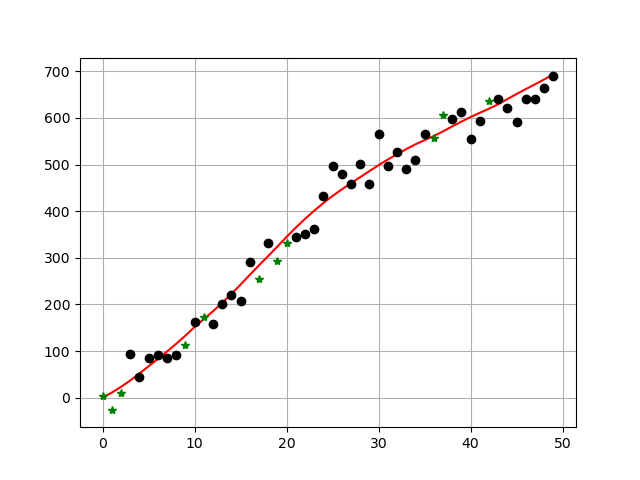

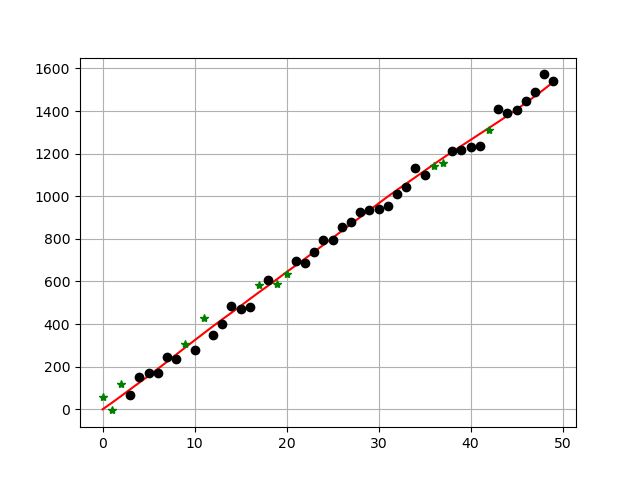

In [26]:
z_real = []
z_miss = []
Pd = 0.8
for i in range(len(z_log)):
    if np.random.uniform() > Pd:
        z_real.append(z_log[i])
        z_miss.append(np.repeat(np.nan,4))
    else:
        z_real.append(np.repeat(np.nan,4))
        z_miss.append(z_log[i])

z_real = np.array(z_real)
z_miss = np.array(z_miss)

plt.figure()
plt.plot(X_log['time'], x, 'r',
         X_log['time'], z_miss[:,0], 'ok',
         X_log['time'], z_real[:,0], '*g')
plt.grid(); plt.show()

plt.figure()
plt.plot(X_log['time'], y, 'r',
         X_log['time'], z_miss[:,2], 'ok',
         X_log['time'], z_real[:,2], '*g')
plt.grid(); plt.show()

## Задание №2.

Постройте на одном графике ранее полученную траекторию движения цели и измерения, если известно, что измерения были получены в полярной системе координат с СКО $\rho = 10 м, \phi = 0,1 гр$.

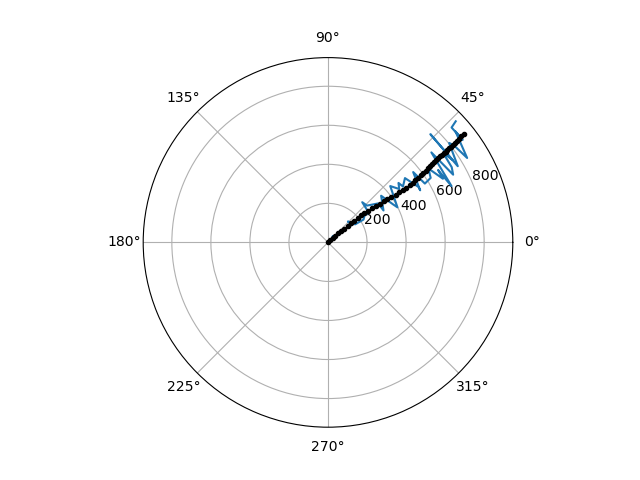

In [29]:
# напишите свой код в этом блоке

T = 50                              # продолжительность траектории
dt = 1                              # шаг дискретизации траектории
time_series = np.arange(1, T, dt)     # отсчеты времени

FPolar = np.array( [[1.0,  dt, 0.0, 0.0],
                    [0.0, 1.0, 0.0, 0.0],
                    [0.0, 0.0, 1.0,  dt],
                    [0.0, 0.0, 0.0, 1.0]])

GPolar = np.array( [[dt**2/2,   0.0],
                    [dt,        0.0],
                    [0.0,   dt**2/2],
                    [0.0,   dt     ]])

XPolar= np.array(   [[1.0],     # X
                     [10.0],    # Vx
                     [1.0],     # y
                     [10.0]])   # Vy
process_noise = 1                   # СКО возмущающего воздействия
np.random.seed(0)                   # выбор случайной последовательности

X_log = {'time':[0], 'state':[XPolar]}   # сохранение данных для отображения
for t in time_series:
    ax1 = np.random.normal(0, process_noise, (2, 1))
    XPolar = FPolar@XPolar + GPolar@ax1
    X_log['time'].append(t)
    X_log['state'].append(XPolar)

x  = np.array([X_log['state'][i][0] for i in range(len(X_log['state']))]).squeeze()  # выборка комопненты 'х'  ~ [0] из вектора состояния
Vx = np.array([X_log['state'][i][1] for i in range(len(X_log['state']))]).squeeze()  # выборка комопненты 'Vx' ~ [1] из вектора состояния
y  = np.array([X_log['state'][i][2] for i in range(len(X_log['state']))]).squeeze()  # выборка комопненты 'y'  ~ [2] из вектора состояния
Vy = np.array([X_log['state'][i][3] for i in range(len(X_log['state']))]).squeeze()  # выборка комопненты 'Vy' ~ [3] из вектора состояния


sigma_rho = 10  # СКО по дальности
sigma_phi = 0.1 # СКО по угловой координате

e_rho = np.random.normal(0, sigma_rho, (len(x),))   # формирование массивов ошибок
e_phi = np.random.normal(0, sigma_phi, (len(y),))   #

rho = np.sqrt(x**2 + y**2) + e_rho  # формула из маркдауна выше
phi = np.arctan(y/x) + e_phi    # формула из маркдауна выше
plt.figure()
plt.polar(phi, rho,
          phi-e_phi, rho-e_rho, '.k')